# Data Visualization in Python
---

## Table of contents
- [Introduction](#Introduction)
- [Learning Objectives](#Learning-Objectives)
- [Setup - Load Python Packages](#Setup---Load-Python-Packages)
- [Setup - Loading Data](#Setup---Loading-Data)
- [Our First Chart in matplotlib](#Our-First-Chart-in-matplotlib)
    - [A Note on Data Sourcing](#A-Note-on-Data-Sourcing)
    - [Layering in Matplotlib](#Layering-in-Matplotlib)
    - [Our First Chart in seaborn](#Our-First-Chart-in-seaborn)
- [Choosing a Data Visualization package](#Choosing-a-Data-Visualization-Package)
    - [Seaborn and Matplotlib](#Seaborn-and-matplotlib)
- [Visual Encodings](#Visual-Encoding)
    - [Using Hex Codes for Colors](#Using-Hex-Codes-for-Colors)
    - [Saving Charts as a Variable](#Saving-Charts-as-a-Variable)
    - [Directed Scatterplot](#Directed-Scatterplot)
    - [An Important Note on Graph Titles](#An-Important-Note-on-Graph-Titles)
    - [Exporting Completed Graphs](#Exporting-Completed-Graphs)
- [Exercises & Practice](#Exercises-&-Practice)
    - [Exercise 1: Heatmap](#Exercise-1:-Heatmap)
    - [Exercise 2](#Exercise-2)
    - [Exercise 3](#Exercise-3)
    - [Exercise 4](#Exercise-4)
- [Other Resources](#Other-Resources)
- [Other Python Visualization Libraries](#Other-Python-Visualization-Libraries)

## Introduction

In this module, you will learn to quickly and flexibly make a wide series of visualizations for exploratory data analysis and communicating to your audience. This module contains a practical introduction to data visualization in Python and covers important rules that any data visualizer should follow.

## Learning Objectives

* Learn critical rules about data visualization (using the correct graph types, correctly labeling all visual encodings, properly sourcing data).

* Become familiar with a core base of data visualization tools in Python - specifically matplotlib and seaborn.

* Start to develop the ability to conceptualize what visualizations are going to best reveal various types of patterns in your data.

* Learn more about class data with exploratory analyses.



## Setup - Load Python Packages

In [1]:
import pandas as pd

import matplotlib as mplib
import matplotlib.pyplot as plt # visualization package
import seaborn as sns

# database connections
from sqlalchemy import create_engine # to get data from database
from sqlalchemy import __version__ as sql_version
from sqlalchemy import inspect

# so images get plotted in the notebook
%matplotlib inline

## Setup - Loading Data

<span style="background-color: #FFFF00"> Queries must be changed: Use Water data? </span>

In [3]:
# to create a connection to the database, we need to pass the name of the database and host of the database
# db_name = "appliedda"
# db_host = "10.10.2.10"
# conn = psycopg2.connect(database=db_name, host=db_host) #database connection

# See all available schemas:
# pd.read_sql("SELECT schema_name FROM information_schema.schemata LIMIT 10;", conn)

In [2]:
# We can look at the tables within each schema:
# pd.read_sql("SELECT * FROM pg_tables WHERE schemaname = 'ides'", conn)
# pd.read_sql("SELECT * FROM pg_tables WHERE schemaname = 'ada_class3'", conn)

In [5]:
# We can look at column names within tables:
# query = '''
# SELECT * 
# FROM information_schema.columns 
# WHERE table_schema = 'ada_class3' AND table_name = 'il_wage_hh_recipient'
# '''
# pd.read_sql(query, conn)

In [7]:
# query = '''
# SELECT ssn, year, SUM(wage) total_wages 
# FROM ada_class3.il_wage_hh_recipient
# WHERE year in (2005, 2010, 2015) AND quarter = 1
# GROUP BY ssn, year
# '''
# person_wages = pd.read_sql(select_string, conn)
# print("Number of rows returned: " + str(len(person_wages)))

In [28]:
# TEMP:
mo_wac_S000_JT01 = pd.read_csv('../../data/LODES/mo_wac_S000_JT01.csv')
xwalk = pd.read_csv('../../data/LODES/mo_xwalk.csv')
mo_wac_2015 = mo_wac_S000_JT01[mo_wac_S000_JT01['year']==2015]

/Users/nj995/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
mo_wac_2015.head()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate,year
51259,290019501001019,4,0,2,2,4,0,0,0,0,...,0,0,0,0,0,0,0,0,20170919,2015
51260,290019501001022,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,20170919,2015
51261,290019501001025,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,20170919,2015
51262,290019501001047,41,10,22,9,6,26,9,0,0,...,0,0,0,0,0,0,0,0,20170919,2015
51263,290019501001055,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,20170919,2015


## Our First Chart in matplotlib

- [Back to top](#Introduction)

Below, we make our first chart in matplotlib. We'll come back to the choice of this particular library in a second, but for now just appreciate that the visualization is creating sensible scales, tick marks, and gridlines on its own.

<span style="background-color: #FFFF00"> SHOULD WE INLCUDE BLOCKS WITH 0 JOBS? </span>

In [46]:
## Let's see what the distribution of the numeber of The number of jobs per block is Wages often have a very strong right skew:
max_jobs = mo_wac_2015['C000'].max()
print("Maximum number of jobs = " + str(max_jobs))

## But most a vast majority of the blocks under 100 jobs:
(mo_wac_2015['C000'] < 100).value_counts()

Maximum number of jobs = 12590


True     47917
False     5195
Name: C000, dtype: int64

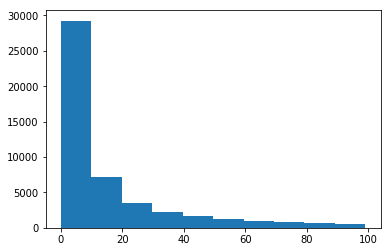

In [47]:
## So let's just look at the wages under $15,000
mo_wac_lim = mo_wac_2015[mo_wac_2015['C000'] < 100]

# Make a simple histogram:
plt.hist(mo_wac_lim['C000'])
plt.show()

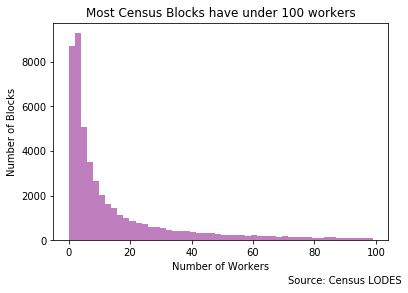

In [51]:
## We can change options within the hist function (e.g. number of bins, color, transparency:
plt.hist(mo_wac_lim['C000'], bins=50, facecolor="purple", alpha=0.5)

## And we can affect the plot options too:
plt.xlabel('Number of Workers')
plt.ylabel('Number of Blocks')
plt.title('Most Census Blocks have under 100 workers')

## And add Data sourcing:
### xy are measured in percent of axes length, from bottom left of graph:
plt.annotate('Source: Census LODES', xy=(0.7,-0.2), xycoords="axes fraction")

## We use plt.show() to display the graph once we are done setting options:
plt.show()

### A Note on Data Sourcing

Data sourcing is a critical aspect of any data visualization. Although here we are simply referencing the agencies that created the data, it is ideal to provide as direct of a path as possible for the viewer to find the data the graph is based on. When this is not possible (e.g. the data is sequestered), directing the viewer to documentation or methodology for the data is a good alternative. Regardless, providing clear sourcing for the underlying data is an **absolutely requirement** of any respectable visualization, and further builds trusts and enables reproducibility.

### Layering in Matplotlib
This functionality - where we can make consecutive changes to the same plot - also allows us to layer on multiple plots. By default, the first graph you create will be at the bottom, with ensuing graphs on top.

Below, we see the 2005 histogram, in blue, is beneath the 2015 histogram, in orange. You might also notice that the distribution of income for welfare recipients has shifted upward over that ten year period.

In [ ]:
plt.hist(person_wages_lim[person_wages_lim["year"] == 2005].total_wages, facecolor="blue", alpha=0.5)
plt.hist(person_wages_lim[person_wages_lim["year"] == 2015].total_wages, facecolor="orange", alpha=0.5)
plt.annotate('Source: IL IDES & IDHS', xy=(0.7,-0.2), xycoords="axes fraction")
plt.show()

### Our First Chart in seaborn

Below, we quickly use pandas to create an aggregation of our wages data - the average wages by year. Then we pass the data to the barplot function in the `seaborn` function, which recall we imported as `sns` for short.

In [ ]:
## Calculate average wages by year:
avg_annual_wages = person_wages.groupby('year')['total_wages'].mean().reset_index()
avg_annual_wages.columns = ['year','average_wages']

print(type(avg_annual_wages))
print("***********")
print(avg_annual_wages)

In [ ]:
## Barplot function
# Note we can reference column names (in quotes) in the specified data:
sns.barplot(x='year', y='average_wages', data=avg_annual_wages)
plt.show()

You might notice that if you don't include plt.show(), Jupyter will still produce a chart. However this is not the case in other environments. So we will continue using plt.show() to more formally ask for Python to display the chart we have constructed, after adding all layers and setting all options.

In [ ]:
## Seaborn has a great series of charts for showing distributions across a categorical variable:
sns.factorplot(x='year', y='total_wages', hue='year', data=person_wages_lim, kind='box')
plt.show()

## Other options for the 'kind' argument include 'bar' and 'violin'

Already you might notice some differences between matplotlib and seaborn - at the very least seaborn allows us to more easily reference column names within a pandas dataframe, whereas matplotlib clearly has a plethora of options.

## Choosing a Data Visualization Package

- [Back to top](#Introduction)

There are many excellent data visualiation modules available in Python, but for the tutorial we will stick to the tried and true combination of `matplotlib` and `seaborn`. You can read more about different options for data visualization in Python in the [More Resources](#More-Resources:) section at the bottom of this notebook. 

`matplotlib` is very expressive, meaning it has functionality that can easily account for fine-tuned graph creation and adjustment. However, this also means that `matplotlib` is somewhat more complex to code.

`seaborn` is a higher-level visualization module, which means it is much less expressive and flexible than matplotlib, but far more concise and easier to code.

It may seem like we need to choose between these two approaches, but this is not the case! Since `seaborn` is itself written in `matplotlib` (you will sometimes see `seaborn` be called a `matplotlib` 'wrapper'), we can use `seaborn` for making graphs quickly and then `matplotlib` for specific adjustments. When you see `plt` referenced in the code below, we are using `matplotlib`'s pyplot submodule.


`seaborn` also improves on `matplotlib` in important ways, such as the ability to more easily visualize regression model results, creating small multiples, enabling better color palettes, and improve default aesthetics. From [`seaborn`'s documentation](https://seaborn.pydata.org/introduction.html):

> If matplotlib 'tries to make easy things easy and hard things possible', seaborn tries to make a well-defined set of hard things easy too. 

In [ ]:
## Seaborn offers a powerful tool called FacetGrid for making small multiples of matplotlib graphs:

### Create an empty set of grids:
facet_histograms = sns.FacetGrid(person_wages_lim, col='year', hue='year')

## "map' a histogram to each grid:
facet_histograms = facet_histograms.map(plt.hist, 'total_wages')

## Data Sourcing:
plt.annotate('Source: IL IDES & IDHS', xy=(0.6,-0.35), xycoords="axes fraction")
plt.show()

In [ ]:
## Alternatively, you can create and save several charts:
for i in set(person_wages_lim["year"]):
    tmp = person_wages_lim[person_wages_lim["year"] == i]
    plt.hist(tmp["total_wages"])

    plt.xlabel('Total Wages')
    plt.ylabel('Number of Recipients')
    plt.title(str(i))
    
    plt.annotate('Source: IL IDES & IDHS', xy=(0.7,-0.2), xycoords="axes fraction")

    filename = "graph_" + str(i) + ".pdf"
    plt.savefig(filename)
    plt.show()

### Seaborn and matplotlib 

Below, we use seaborn for setting an overall aesthetic style and then faceting (created small multiples). We then use matplotlib to set very specific adjustments - things like adding the title, adjusting the locations of the plots, and sizing th graph space. This is a pretty protoyptical use of the power of these two libraries together. 

More on [Seaborn's set_style function](https://seaborn.pydata.org/generated/seaborn.set_style.html).
More on [matplotlib's figure (fig) API](https://matplotlib.org/api/figure_api.html).

In [ ]:
# Seaborn's set_style function allows us to set many aesthetic parameters.
sns.set_style("whitegrid")

facet_histograms = sns.FacetGrid(person_wages_lim, col='year', hue='year')
facet_histograms.map(plt.hist, 'total_wages')

## We can still change options with matplotlib, using facet_histograms.fig
facet_histograms.fig.subplots_adjust(top=0.85)
facet_histograms.fig.suptitle("Recipients Income Gains Jumped in 2015", fontsize=14)
facet_histograms.fig.set_size_inches(10,5)

## Add a legend for hue (color):
facet_histograms = facet_histograms.add_legend()

## Data Sourcing:
plt.annotate('Source: IL DOC & IDES', xy=(0.6,-0.35), xycoords="axes fraction")
plt.show()

## Visual Encodings

We often start with charts that use 2-dimensional position (like a scatterplot) or that use height (like histograms and bar charts). This is because these visual encodings - the visible mark that represents the data - are particularly perceptually strong. This means that when humans view these visual encodings, they are more accurate in estimating the underlying numbers than encodings like size (think circle size in a bubble chart) or angle (e.g. pie chart).

For more information on visual encodings and data visualization theory, see:

* [Designing Data Visualizations, Chapter 4](http://www.safaribooksonline.com/library/view/designing-data-visualizations/9781449314774/ch04.html) by Julie Steele and Noah Iliinsky

* Now You See It - book by Stephen Few

In [ ]:
select_string = "SELECT year, avg(total_wages) avg_wages, count(*) num_recipients"
select_string += " FROM (SELECT ssn, year, SUM(wage) total_wages FROM ada_class3.il_wage_hh_recipient"
select_string += " WHERE quarter = 1"
select_string += " GROUP BY ssn, year) tmp"
select_string += " GROUP BY year"
select_string += " ORDER BY year"

print(select_string)

yearly_avg_wages = pd.read_sql(select_string, engine)

In [ ]:
yearly_avg_wages = yearly_avg_wages.sort_values('year')
yearly_avg_wages.head()

In [ ]:
## We can pass a single value to a the tsplot function to get a simple line chart:
sns.tsplot(data=yearly_avg_wages['avg_wages'], color="#179809")

## Data Sourcing:
plt.annotate('Source: IL IDES & IHDS', xy=(0.8,-0.20), xycoords="axes fraction")
plt.show()

### Using Hex Codes for Color

- [Back to top](#Introduction)

In the graph above, you can see I set the color of the graph with pund sign `#` followed by a series of six numbers. This is a hexcode - which is short for hexadecimal code. A hexadecimal code lets you specify one of over 16 million colors using combinations of red, green, and blue. It first has two digits for red, then two digits for green, and lastly two digits for blue: `#RRGGBB`

Further, these codes allow for you to specify sixteen integers (thus hexadecimal) for each digits, in this order:

(0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F)

Over time, it gets easier to read these codes. For instance, above, I used the hex code "#179809". Understanding how hex codes work, I can see that there is a relatively low number for red (17) and fairly high number for green (98) and another low number for blue (09). Thus it shouldn't be too surprising that a green color resulted in the graph.

Tools like [Adobe Color](https://color.adobe.com) and this [Hex Calculator](https://www.w3schoosl.com/colors/colors_hexadecimal.asp) can help you get used to this system.

Most modern browsers also support eight digit hex codes, in which the first two enable transparency, which is often called 'alpha' in data visualization: `#AARRGGBB`

In [ ]:
## We can add the time argument to set the x-axis correctly. And let's change the color, since we can:
sns.tsplot(data=yearly_avg_wages['avg_wages'], time=yearly_avg_wages['year'], color="#B088CD")

# Color Note: B088CD
## The highest values are red 'B0' and blue 'CD', so we can expect a mix of those
## Further this is high in all three colors, so it'll be light, not dark

## Data Sourcing:
plt.annotate('Source: IL IDES & IDHS', xy=(0.8,-0.20), xycoords="axes fraction")
plt.show()

### Saving Charts As a Variable

Although as you can see above, we can immediately print our plots on a page, it is generally better to save them as variable. We can then alter the charts over several lines before finally displaying them with the `show()` function, which comes from the `matplotlib` `pyplot` module we loaded earlier.

In [ ]:
## Save the line chart as 'graph'
graph = sns.tsplot(data=yearly_avg_wages['avg_wages'], time=yearly_avg_wages['year'])

## To add data labels, we loop over each row and use graph.text()
for i, row, in yearly_avg_wages.iterrows():
    graph.text(row["year"] + 0.05, row["avg_wages"] - 50, int(row["year"]))
    
## Now change x-axis and y-axis labels:
graph.set(xlabel="Year", ylabel="Average Annual Wages")
graph.set(title="Average Wages Over Time")

plt.annotate('Source: IL IDES & IDHS', xy=(0.8,-0.20), xycoords="axes fraction")

## Then display the plot:
plt.show()

In [ ]:
# We can also look at a scatterplot of the number of people and averages wages in each year:
scatter = sns.lmplot(x='num_recipients', y='avg_wages', data=yearly_avg_wages, fit_reg=False)
scatter.set(xlabel="Number of Recipients", ylabel="Average Annual Wages", title="Number and Wages of IL Welfare Recipients")
 
## Sourcing:
plt.annotate('Source: IL IDES & IDHS', xy=(0.8,-0.20), xycoords="axes fraction")

plt.show()

### Directed Scatterplot

A directed scatterplot still uses one point for each year, but then uses the x-axis and the y-axis for variabes. In order to maintain the ordinal relationship, a line is drawn between the years. To do this in seaborn, we actually use sns.FacetGrid, which allows us to overlay different plots together. Specifically, it lets us overlay a scatterplot (`plt.scatter` and a line chart `plt.plot`).

### An Important Note on Graph Titles:

The title of a visualization occupies the most valuable real estate on the page. If nothing else, you can be reasonably sure a viewer will at least read the title and glance at your visualization. This is why you want to put thought into making a clear and effective title that acts as a **narrative** for your chart. Many novice visualizers default to an **explanatory** title, something like: "Income and Number of Recipients over Time (2005-2015)". This title is correct - it just isn't very useful. This is particularly true since any good graph will have explained what the visualization is through the axes and legends. Instead, use the title to reinforce and explain the core point of the visualization. It should answer the question "Why is this graph important?" and focus the viewer onto the most critical take-away.

In [ ]:
cncted_scatter = sns.FacetGrid(data=yearly_avg_wages, size=7)
cncted_scatter.map(plt.scatter, 'num_recipients', 'avg_wages', color="#A72313")
cncted_scatter.map(plt.plot, 'num_recipients', 'avg_wages', color="#A72313")
cncted_scatter.set(title="Rising Wages of Welfare Recipients", xlabel="Number of Recipients", ylabel="Average Wages")

## Adding data labels:
for i, row, in yearly_avg_wages.iterrows():
    plt.text(row["num_recipients"], row["avg_wages"], int(row["year"]))
    
## Sourcing:
plt.annotate('Source: IL IDES & IDHS', xy=(0.8,-0.10), xycoords="axes fraction")

plt.show()

### Exporting Completed Graphs

When you are satisfied with your visualization, you may want to save a a copy outside of your notebook. You can do this with `matplotlib`'s savefig function. You simply need to run:

plt.savefig("fileName.fileExtension")

The file extension is actually surprisingly important. Image formats like png and jpeg are actually **not ideal**. These file formats store your graph as a giant grid of pixels, which is space-efficient, but can't be edited later. Saving your visualizations instead as a PDF is strongly advised. PDFs are a type of vector image, which means all the component of the graph will be maintained.

With PDFs, you can later open the image in a program like Adobe Illustrator and make changes like the size or typeface of your text, move your legends, or adjust the colors of your visual encodings. All of this would be impossible with a png or jpeg.

In [ ]:
cncted_scatter = sns.FacetGrid(data=yearly_avg_wages, size=7)
cncted_scatter.map(plt.scatter, 'num_recipients', 'avg_wages', color="#A72313")
cncted_scatter.map(plt.plot, 'num_recipients', 'avg_wages', color="#A72313")
cncted_scatter.set(title="Rising Wages of Welfare Recipients", xlabel="Number of Recipients", ylabel="Average Wages")

## Adding data labels:
for i, row, in yearly_avg_wages.iterrows():
    plt.text(row["num_recipients"], row["avg_wages"], int(row["year"]))
    
## Sourcing:
plt.annotate('Source: IL IDES & IDHS', xy=(0.8,-0.10), xycoords="axes fraction")

plt.savefig('dscatter.png')
plt.savefig('dscatter.pdf')

## Exercises & Practice

- [Back to top](#Introduction)

### Excercise 1: Heatmap

Below, I query the database for the average sentence of men, broken out by their race and education level. I then format this data into a wider form using pandas - where each row corresponds to an education level and each column corresponds to a race. This grid is format that `seaborn`'s heatmap function is expecting. Understanding the relationship between your data and the resulting graph is an important aspect of data visualization - and you can really only master this with practice.

Query one of the tables again and create dataframe in the correct format, then pass that along to seaborn's heatmap function. Use the code you learned above to add a title, better axis labels, and data sourcing.

Note that the color map used here `viridis` is a scientifically derived color palette meant to be perceptually linear. The color maps `inferno`, `plasma` and `magama` also all meet this criteria.

#### More information:
* [seaborn heatmap documentation](http://seaborn.pydata.org/generated/seaborn.heatmap.html)

* [matplotlib color map documentation](http://matplotlib.org/users/colormap.html)

In [ ]:
## Querying Average Jailtime by Race and Gender 
select_string = "SELECT race, educlvl, avg(jailtime) as avg_jailtime"
select_string += " FROM ildoc.ildoc_admit"
select_string += " WHERE sex = 'M'"
select_string += " GROUP BY race, educlvl"

print(select_string)

jail = pd.read_sql(select_string, engine)

In [ ]:
## Format the data for a heatmap:
jail = jail.pivot("educlvl", "race", "avg_jailtime")
jail = jail.round(0)
jail = jail.apply(pd.to_numeric)
print(jail)

## Create a heatmap, with annotations:
sns.heatmap(jail, annot=True, fmt='g', cmap="viridis")
plt.show()

In [ ]:
## Enter your code for excercise 1 here:

    


### Exercise 2

Below, we pull two continuous variables from the Illinois Department of Employment Security, summed over each employer. See if you can pass this data to the sns.jointplot() function. I have filled in some of the arguments for you, while others need completion.

In [ ]:
pd.read_sql("SELECT * FROM ada_class3.il_des_subset_2014q3 LIMIT 5;",engine)

In [ ]:
## Querying Total Wages and Jobs by Employer
select_string = "SELECT name_legal, sum(total_wages) as agg_wages, sum(total_jobs) as agg_jobs"
select_string += " FROM ada_class3.il_des_subset_2014q3"
select_string += " GROUP BY name_legal"

print(select_string)

## Run SQL query:
employers = pd.read_sql(select_string, engine)
print(len(employers))

## Take a one percent sample to ease computational burden:
employers_lim = employers.sample(frac=0.01)
print(len(employers_lim))

In [ ]:
## Fill in the arguments (x, y, data, kind) below to get the visualiztion to run.
sns.jointplot(x=, y=, data=, kind=, color="#137B80", marginal_kws={"bins":30})
plt.show()

### Exercise 3

Let's see if we can use seaborn's FacetGrid to create small multiple scatterplots. First you need to query a database and get at least one categorical variable and at least two continuous variables (floats).

Then try passing this data to the FacetGrid function from `seaborn` and the scatter function from `matplotlib`. 

[FacetGrid Documentation](http://seaborn.pydata.org/examples/many_facets.html)

In [ ]:
## Pseudo-code to get you started:
grid = sns.FacetGrid(dataframe, col = "categorical_var", hue="categorical_var", col_wrap=2)
grid.map(plt.scatter("x_var", "y_var"))



In [ ]:
## Enter your code for excercise 3 here:



### Exercise 4

Test your mettle. Check out the seaborn [data visualization gallery](http://seaborn.pydata.org/examples) and see if you can implement an interesting visualization.

## More Resources

* [A Thorough Comparison of Python's DataViz Modules](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair)

* [Seaborn Documentation](http://seaborn.pydata.org)

* [Matplotlib Documentation](https://matplotlib.org)

* [Advanced Functionality in Seaborn](blog.insightdatalabs.com/advanced-functionality-in-seaborn)

## Other Python Visualization Libraries

* [Bokeh](http://bokeh.pydata.org)

* [Altair](https://altair-viz.github.io)

* [ggplot](http://ggplot.yhathq.com.com)

* [Plotly](https://plot.ly)